# Lending Club Loan Data Analysis

## Importing Required Libraries and Data

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import tensorflow_addons as tfa
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve,auc

In [107]:
df = pd.read_csv("loan_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [108]:
Categorical_colms = df.select_dtypes(['object']).columns
Numerical_colms = df.select_dtypes(['float64','int64']).columns
print(df.nunique())
print('----------------------------------------')
print('Unique elements in categorical columns:')
for col in Categorical_colms:
    print('{}:{}'.format(col,df[col].unique()))
print('----------------------------------------')
print('Unique elements in Numerical columns with nunique<15:')
for col in Numerical_colms:
    if(df[col].nunique()<15):
        print('{}:{}'.format(col,df[col].unique()))

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64
----------------------------------------
Unique elements in categorical columns:
purpose:['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']
----------------------------------------
Unique elements in Numerical columns with nunique<15:
credit.policy:[1 0]
delinq.2yrs:[ 0  1  2  4  3  5  6 13  7  8 11]
pub.rec:[0 1 2 3 4 5]
not.fully.paid:[0 1]


<AxesSubplot:xlabel='purpose', ylabel='count'>

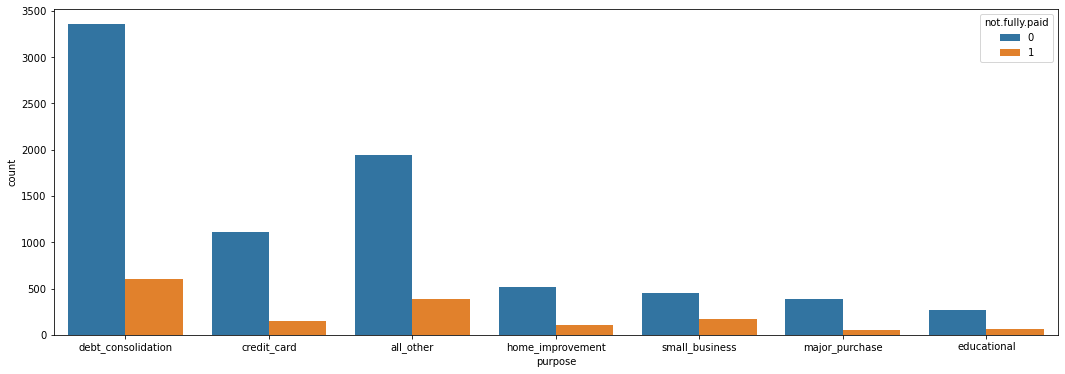

In [109]:
plt.figure(figsize=(18,6))
sns.countplot(x='purpose', data=df, hue='not.fully.paid')

# Feature Transformation

### Transforming categorical values into numerical values (discrete)

In [110]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
ohe = OneHotEncoder()
le = LabelEncoder()
oe=OrdinalEncoder()

In [111]:
df_cat = pd.DataFrame(ohe.fit_transform(df[Categorical_colms]).toarray())
df_cat

,0,1,2,3,4,5,6
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
9573,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9574,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9575,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9576,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [112]:
df.drop(Categorical_colms,axis=1,inplace = True)

In [113]:
df=pd.concat([df,df_cat],axis=1)

In [114]:
df.shape

(9578, 20)

In [115]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

# Exploratory data analysis of different factors of the dataset.

## Balancing the Imbalanced Dataset

In [10]:
not_fully_paid_0 = df[df['not.fully.paid'] == 0]
not_fully_paid_1 = df[df['not.fully.paid'] == 1]

not_fully_paid_0.shape,not_fully_paid_1.shape

((8045, 20), (1533, 20))

In [11]:
df_1_upsampled = resample(not_fully_paid_1, replace = True, n_samples = 8045)
df = pd.concat([not_fully_paid_0, df_1_upsampled])

df = shuffle(df)

In [12]:
df['not.fully.paid'].value_counts() 

0    8045
1    8045
Name: not.fully.paid, dtype: int64

<AxesSubplot:>

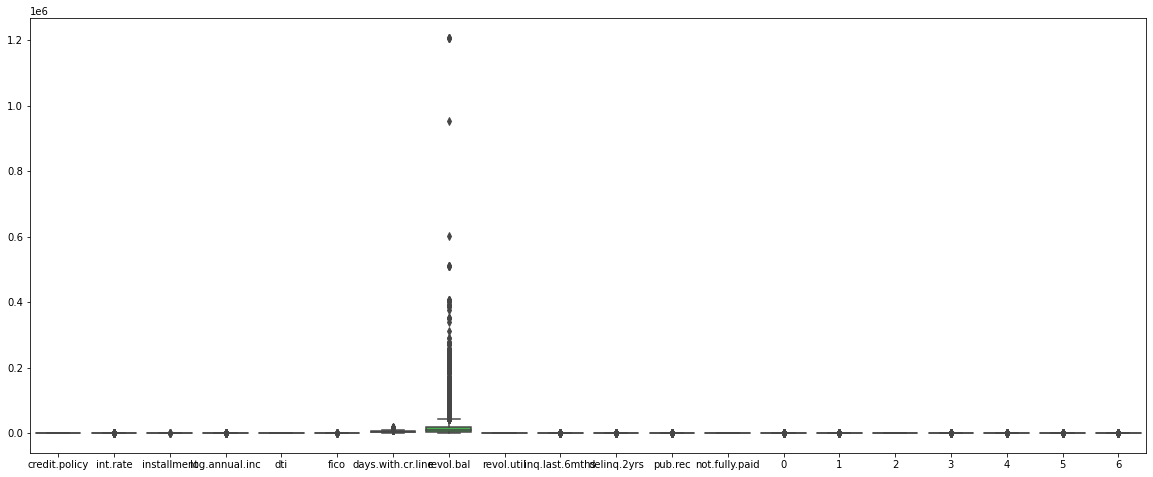

In [14]:
fig = plt.figure(figsize=(20,8))
sns.boxplot(data=df)

Boxplot of:  credit.policy


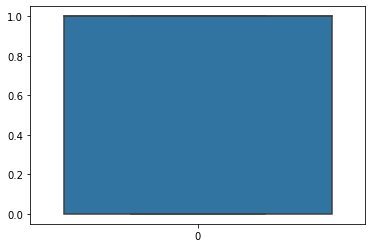

Boxplot of:  int.rate


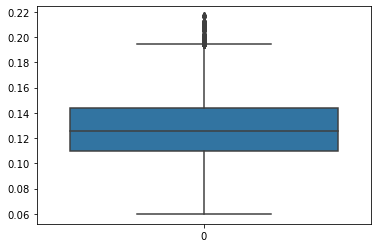

Boxplot of:  installment


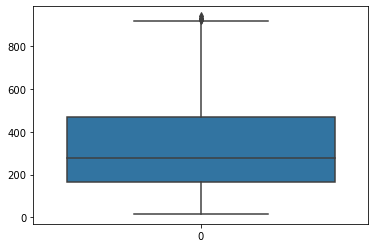

Boxplot of:  log.annual.inc


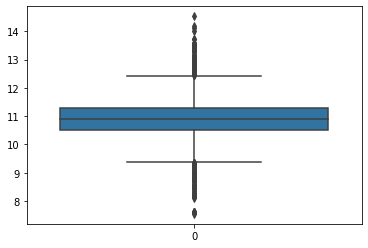

Boxplot of:  dti


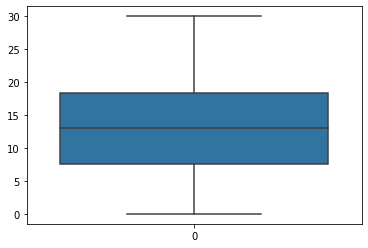

Boxplot of:  fico


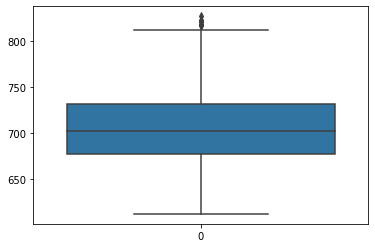

Boxplot of:  days.with.cr.line


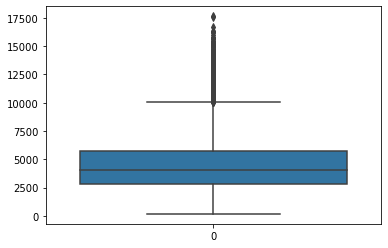

Boxplot of:  revol.bal


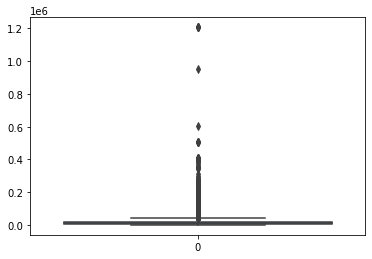

Boxplot of:  revol.util


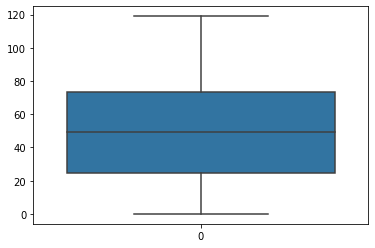

Boxplot of:  inq.last.6mths


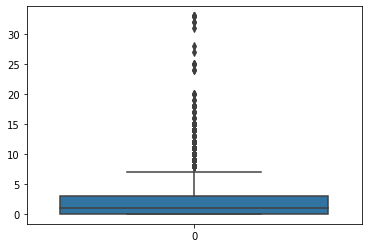

Boxplot of:  delinq.2yrs


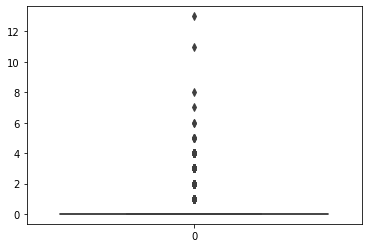

Boxplot of:  pub.rec


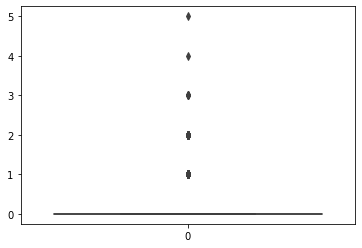

Boxplot of:  not.fully.paid


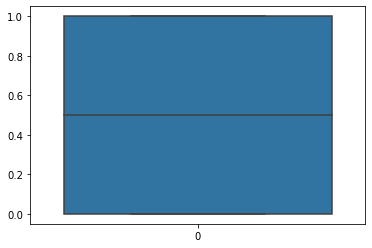

In [15]:
for col in Numerical_colms:
    print('Boxplot of: ',col)
    sns.boxplot(data = df[col])
    plt.show()

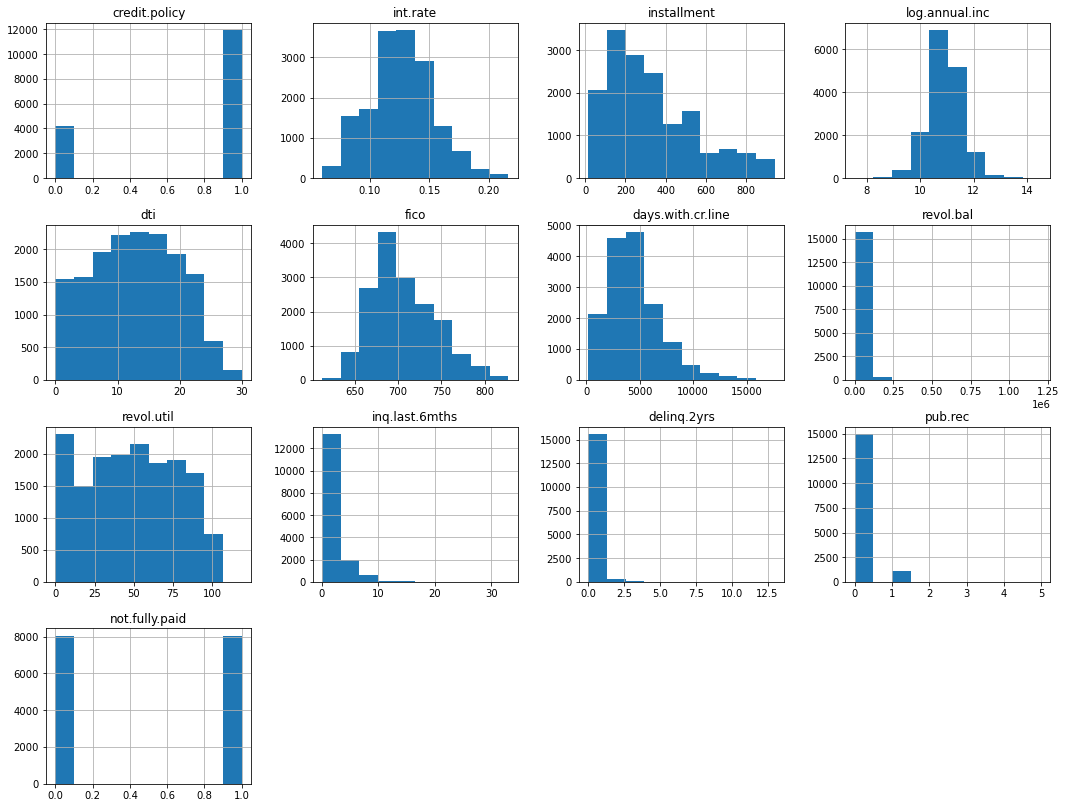

In [16]:
df[Numerical_colms].hist(figsize=(18,14));

In [17]:
print('Number of unique values in revol.bal:',df['revol.bal'].nunique())
print('----------------------------------')
df['revol.bal'].value_counts()

Number of unique values in revol.bal: 7859
----------------------------------


0         580
7562       17
566        17
12308      16
3943       16
         ... 
211463      1
5010        1
13852       1
18076       1
12785       1
Name: revol.bal, Length: 7859, dtype: int64

In [18]:
print('Number of unique values in delinq.2yrs:',df['delinq.2yrs'].nunique())
print('----------------------------------')
df['delinq.2yrs'].value_counts()

Number of unique values in delinq.2yrs: 11
----------------------------------


0     14166
1      1428
2       337
3       115
4        32
5         6
6         2
11        1
13        1
7         1
8         1
Name: delinq.2yrs, dtype: int64

In [19]:
print('Number of unique values in delinq.2yrs:',df['pub.rec'].nunique())
print('----------------------------------')
df['pub.rec'].value_counts()

Number of unique values in delinq.2yrs: 6
----------------------------------


0    14977
1     1077
2       29
3        5
4        1
5        1
Name: pub.rec, dtype: int64

## Handling the Outliers

In [20]:
def Outlier(data2, cols, rep):
    data = data2.copy()
    for column in cols:
        if data[column].dtype != object:
            Q1 = np.percentile(data[column],25)
            Q3 = np.percentile(data[column],75)
            IQR =  Q3 - Q1
            lower = Q1 - (1.5 * IQR) # min value allowed
            upper = Q3 + (1.5 * IQR)  # max. value allowed
            if (rep == 'mean'):
                mean = data[column].mean()
                data[column] = data[column].apply(lambda x: mean if x>upper else  mean if x<lower else x)   
            elif(rep == 'lu'):
                data[column] = data[column].apply(lambda x: upper if x>upper else  lower if x<lower else x)
            elif(rep == 'median'):
                median = data[column].median()
                data[column] = data[column].apply(lambda x: median if x>upper else  median if x<lower else x)
            elif(rep =='mode'):
                mode = data[column].mode()
                data[column] = data[column].apply(lambda x: mode if x>upper else  mode if x<lower else x)
    return data

Index([    'credit.policy',          'int.rate',       'installment',
          'log.annual.inc',               'dti',              'fico',
       'days.with.cr.line',         'revol.bal',        'revol.util',
          'inq.last.6mths',       'delinq.2yrs',           'pub.rec',
          'not.fully.paid',                   0,                   1,
                         2,                   3,                   4,
                         5,                   6],
      dtype='object')


<AxesSubplot:>

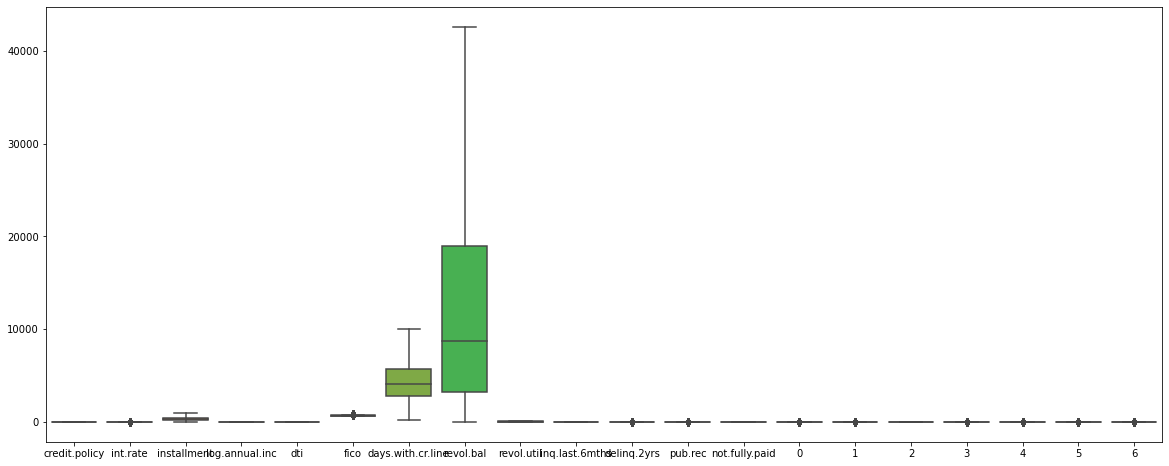

In [21]:
df2 = Outlier(data2 = df, cols = ['delinq.2yrs','fico','pub.rec'],rep = 'mean')
df3 = Outlier(data2 = df2, cols = ['inq.last.6mths','installment','days.with.cr.line','revol.bal','log.annual.inc'],rep = 'lu')
#df3=df
print(df3.columns)

fig = plt.figure(figsize=(20,8))
sns.boxplot(data=df3)

Boxplot of:  credit.policy


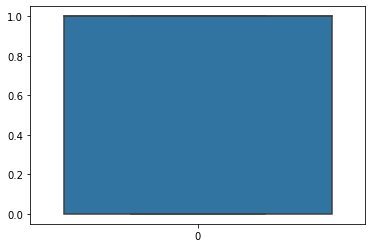

Boxplot of:  int.rate


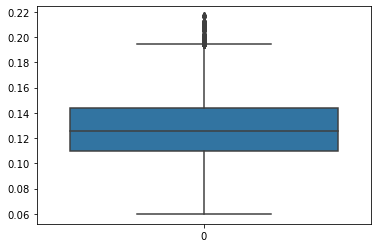

Boxplot of:  installment


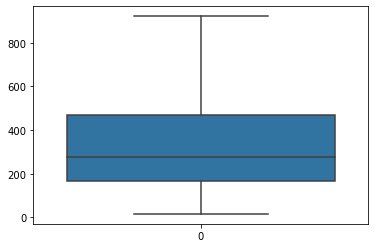

Boxplot of:  log.annual.inc


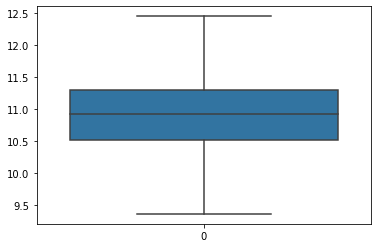

Boxplot of:  dti


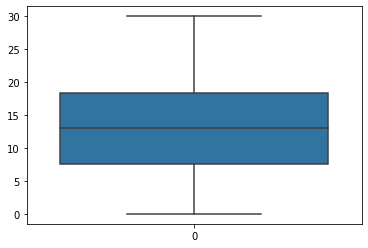

Boxplot of:  fico


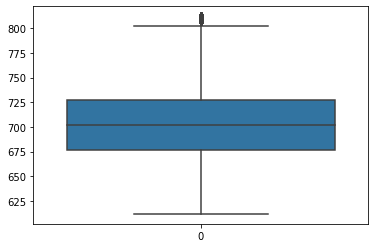

Boxplot of:  days.with.cr.line


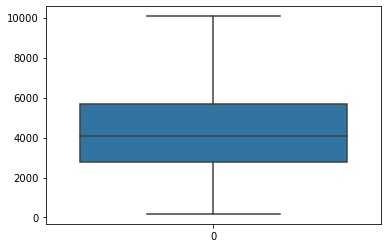

Boxplot of:  revol.bal


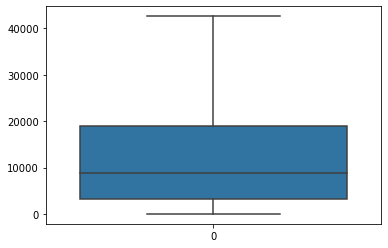

Boxplot of:  revol.util


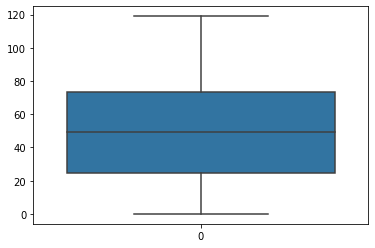

Boxplot of:  inq.last.6mths


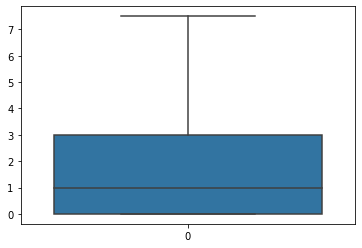

Boxplot of:  delinq.2yrs


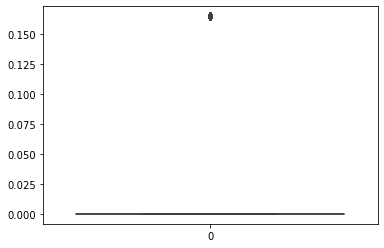

Boxplot of:  pub.rec


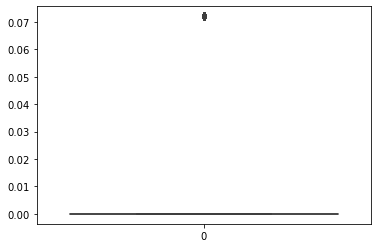

Boxplot of:  not.fully.paid


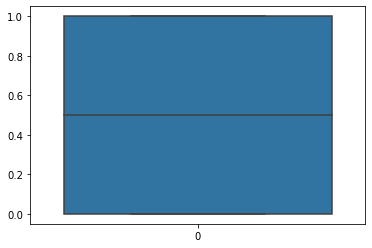

In [22]:
for col in Numerical_colms:
    print('Boxplot of: ',col)
    sns.boxplot(data = df3[col])
    plt.show()

# Additional Feature Engineering

### Checking the correlation between features

<AxesSubplot:>

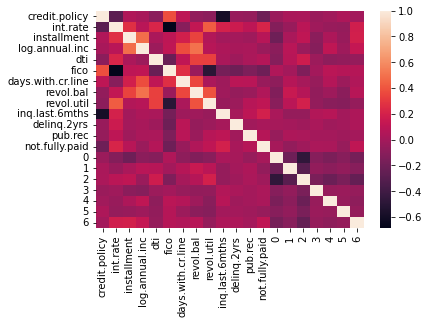

In [23]:
sns.heatmap(df3.corr())

<AxesSubplot:>

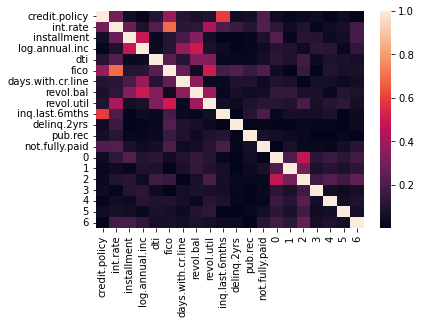

In [24]:
cor_matrix = df3.corr().abs()
sns.heatmap(cor_matrix)

In [25]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
upper_tri

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,0,1,2,3,4,5,6
credit.policy,NaN,0.28971,0.047855,0.012072,0.099434,0.376427,0.101181,0.072401,0.091759,0.590312,0.046999,0.057150,0.207656,0.036755,0.018639,0.028398,0.036266,0.010276,0.035970,0.005179
int.rate,NaN,NaN,0.267282,0.077377,0.216173,0.688037,0.111029,0.120280,0.425121,0.196710,0.159041,0.101933,0.213364,0.124357,0.043091,0.087392,0.015708,0.046008,0.058895,0.180712
installment,NaN,NaN,NaN,0.484455,0.030459,0.100184,0.188301,0.340355,0.054280,0.003863,0.000433,0.018926,0.073120,0.211689,0.017985,0.106359,0.097793,0.033983,0.048335,0.188294
log.annual.inc,NaN,NaN,NaN,NaN,0.033144,0.108624,0.368117,0.497762,0.072499,0.036035,0.011111,0.017962,0.038669,0.097143,0.079525,0.038429,0.115764,0.105800,0.026191,0.127590
dti,NaN,NaN,NaN,NaN,NaN,0.229796,0.106185,0.331974,0.322933,0.021282,0.022963,0.024981,0.057437,0.115004,0.074994,0.169160,0.032611,0.082125,0.073326,0.058788
fico,NaN,NaN,NaN,NaN,NaN,NaN,0.257354,0.039980,0.500587,0.182689,0.213893,0.152350,0.206960,0.045636,0.007675,0.142628,0.005775,0.089360,0.064047,0.067879
days.with.cr.line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.347905,0.025388,0.026125,0.084745,0.083302,0.042858,0.086902,0.068663,0.006350,0.054358,0.059540,0.032992,0.049865
revol.bal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.392370,0.017503,0.060919,0.038281,0.048333,0.135699,0.136661,0.066945,0.073427,0.024884,0.097307,0.074609
revol.util,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048031,0.033082,0.076373,0.106715,0.102856,0.089784,0.192379,0.062966,0.105807,0.118821,0.061387
inq.last.6mths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005569,0.099162,0.194468,0.019961,0.059136,0.055888,0.055637,0.074739,0.007971,0.034587


### Droping those features which have a strong correlation

In [26]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
print(to_drop)

[]


In [27]:
df3.drop(to_drop,axis=1,inplace=True)

In [28]:
df3.corr()['not.fully.paid'].sort_values(ascending = False)

not.fully.paid       1.000000
int.rate             0.213364
inq.last.6mths       0.194468
revol.util           0.106715
6                    0.106372
installment          0.073120
pub.rec              0.066376
dti                  0.057437
revol.bal            0.048333
3                    0.024767
4                    0.017613
delinq.2yrs          0.014558
0                    0.007372
2                   -0.021766
log.annual.inc      -0.038669
days.with.cr.line   -0.042858
5                   -0.049649
1                   -0.068103
fico                -0.206960
credit.policy       -0.207656
Name: not.fully.paid, dtype: float64

# Modeling

In [29]:
df3.shape

(16090, 20)

In [30]:
X = df3.drop('not.fully.paid',axis=1,inplace = False)
y = df3['not.fully.paid']

In [31]:
scFeatures = StandardScaler()
X = pd.DataFrame(scFeatures.fit_transform(X))

In [36]:
def create_model(layers,outputs,activation_fn,activation_fn_output,optim_fn,loss_fn,metric_fn):
    model = tf.keras.models.Sequential()
    for i,nodes in enumerate(layers):
        if (i==0):
            model.add(tf.keras.layers.Dense( units = nodes  , activation= activation_fn , input_shape= (X.shape[1],)))
        else:
            model.add(tf.keras.layers.Dropout(0.2))
            model.add(tf.keras.layers.Dense( units = nodes , activation= activation_fn ))
    model.add(tf.keras.layers.Dense( units = outputs, activation= activation_fn_output ))
    model.compile(optimizer=optim_fn,loss=loss_fn,metrics=[metric_fn])
    return model
model = KerasClassifier(build_fn= create_model,verbose=0)

## Optimising the Hyper-Parameters using GridSearchCV

In [37]:
layers = [[20],[12,12],[256,256,256]]
activations = ['sigmoid','relu']
activations_output = ['softmax','sigmoid']
optim_fn=['sgd','adam']
loss_fn =['binary_crossentropy']
metric_fn = ['accuracy']
param_grid = dict(layers=layers,outputs=[1],activation_fn=activations,activation_fn_output=activations_output,optim_fn= optim_fn,loss_fn=loss_fn,metric_fn=metric_fn,batch_size = [64,128,256],epochs = [10,20])
grid = GridSearchCV(estimator = model,param_grid = param_grid)

In [38]:
grid_results = grid.fit(X,y)

In [39]:
print("Best Score: ",grid_results.best_score_)
print('------------------------')
print(grid_results.best_params_)

Best Score:  0.8025481700897217
------------------------
{'activation_fn': 'relu', 'activation_fn_output': 'sigmoid', 'batch_size': 64, 'epochs': 20, 'layers': [256, 256, 256], 'loss_fn': 'binary_crossentropy', 'metric_fn': 'accuracy', 'optim_fn': 'adam', 'outputs': 1}


## Selecting Best Train-Test Split using Cross Validation

In [55]:
X = df3.drop('not.fully.paid',axis=1,inplace = False)
y = df3['not.fully.paid']

In [56]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
counter = 0
'''for train,test in kfold.split(X):
    print(X[train][:],X[test][:])
    print('--------------')'''
for train,test in kfold.split(X,y):
    counter+=1
    X_train,X_test = X.iloc[train],X.iloc[test]
    y_train,y_test = y.iloc[train],y.iloc[test]
    model = create_model(layers=[256, 256, 256],outputs = 1,activation_fn='relu',activation_fn_output='sigmoid',
                         optim_fn='adam',loss_fn = 'binary_crossentropy',metric_fn = ['accuracy'])
    model.fit(X_train,y_train)
    print("Test Score {}, Train Score {} for Sample Split {}".format(round(model.evaluate(X_test,y_test)[1],3),
                                                                     round(model.evaluate(X_train,y_train)[1],3),counter))

453/453 [==============================] - 1s 1ms/step - loss: 1.0014 - accuracy: 0.5243
Test Score 0.516, Train Score 0.524 for Sample Split 1
453/453 [==============================] - 1s 1ms/step - loss: 3.4140 - accuracy: 0.5011
Test Score 0.515, Train Score 0.501 for Sample Split 2
453/453 [==============================] - 1s 1ms/step - loss: 0.7483 - accuracy: 0.4973
Test Score 0.508, Train Score 0.497 for Sample Split 3
453/453 [==============================] - 1s 1ms/step - loss: 1.1715 - accuracy: 0.5106
Test Score 0.532, Train Score 0.511 for Sample Split 4
453/453 [==============================] - 1s 1ms/step - loss: 0.8907 - accuracy: 0.5098
Test Score 0.511, Train Score 0.51 for Sample Split 5
453/453 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.5182
Test Score 0.493, Train Score 0.518 for Sample Split 6
453/453 [==============================] - 1s 1ms/step - loss: 0.7291 - accuracy: 0.5181
Test Score 0.5, Train Score 0.518 for Sample Spl

In [57]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
counter = 0
for train,test in kfold.split(X):
    counter+=1 
    if counter==4 :
        X_train,X_test = X.iloc[train],X.iloc[test]
        y_train,y_test = y.iloc[train],y.iloc[test]

## Scaling the Data

In [58]:
scFeatures = StandardScaler()
X_train = pd.DataFrame(scFeatures.fit_transform(X_train))
X_test = pd.DataFrame(scFeatures.transform(X_test))

## Training the Final Deep Learning Model

In [88]:
#Custom Callback

class MyThresholdCallBack(tf.keras.callbacks.Callback):
    def __init__(self,cl):
        super(MyThresholdCallBack, self).__init__()
        self.cl = cl
        
    def on_epoch_end(self, epoch, logs=None):
        #test_score = logs["val_f1_score"]
        #train_score = logs["f1_score"]
        test_score = logs["val_accuracy"]
        train_score = logs["accuracy"]
        if test_score > train_score and test_score > self.cl:
            self.model.stop_training = True

In [89]:
model = create_model(layers=[256, 256, 256],outputs = 1,activation_fn='relu',activation_fn_output='sigmoid',
                         optim_fn='adam',loss_fn = 'binary_crossentropy',metric_fn = ['accuracy'])

In [90]:
history = model.fit(X_train,y_train,batch_size=256, epochs=100 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.88)])

Epoch 1/100
57/57 [==============================] - 1s 6ms/step - loss: 0.6408 - accuracy: 0.6220 - val_loss: 0.6101 - val_accuracy: 0.6625
Epoch 2/100
57/57 [==============================] - 0s 5ms/step - loss: 0.6239 - accuracy: 0.6416 - val_loss: 0.5977 - val_accuracy: 0.6706
Epoch 3/100
57/57 [==============================] - 0s 5ms/step - loss: 0.6151 - accuracy: 0.6537 - val_loss: 0.5967 - val_accuracy: 0.6650
Epoch 4/100
57/57 [==============================] - 0s 6ms/step - loss: 0.6066 - accuracy: 0.6585 - val_loss: 0.5886 - val_accuracy: 0.6787
Epoch 5/100
57/57 [==============================] - 0s 6ms/step - loss: 0.6014 - accuracy: 0.6605 - val_loss: 0.5863 - val_accuracy: 0.6799
Epoch 6/100
57/57 [==============================] - 0s 6ms/step - loss: 0.5938 - accuracy: 0.6712 - val_loss: 0.5810 - val_accuracy: 0.6979
Epoch 7/100
57/57 [==============================] - 0s 6ms/step - loss: 0.5867 - accuracy: 0.6826 - val_loss: 0.5748 - val_accuracy: 0.6936
Epoch 8/100
5

In [101]:
pr_test =(model.predict(X_test)>0.5).astype("int32")
pr_test

51/51 [==============================] - 0s 1ms/step


array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]])

## Validating the Deep Learning model results

In [102]:
accuracy_score(y_test, pr_test)

0.9098819142324425

In [103]:
print(classification_report(y_test, pr_test))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       843
           1       0.85      0.99      0.91       766

    accuracy                           0.91      1609
   macro avg       0.92      0.91      0.91      1609
weighted avg       0.92      0.91      0.91      1609



AUC:  0.9135206538874899


Text(0.5, 1.0, 'ROC')

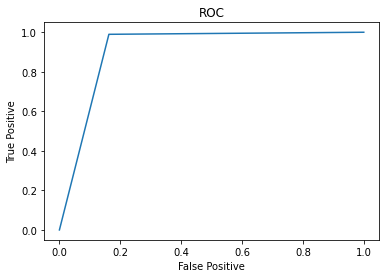

In [104]:
fpr,tpr,threshold = roc_curve(y_test,pr_test)
AUC = auc(fpr,tpr)
print('AUC: ',AUC)
plt.plot(fpr,tpr)
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC")

# From the above results we can see that we have built a very good Deep Learning model which has an f1_score of 91.3% and accuracy of 91%.This has been achieved using:
### 1.Data Preprocessing,
### 2.Balancing the data set by resampling,
### 3.Applying EDA techniques to deal with Outliers,
### 4.Handling strongly correlated features
### 5.Scaling the data,
### 6.Creating Artificial Neural Network which can handle over-fitting,
### 7.Using GridSearchCV to optimize the hyperparameters,
### 8.Using K-fold Cross Validation to find better train-test split,
### 9.Modelling Artificial Neural Network
### 10.Validating the Deep Learning model results